# **1. INSTALL AND IMPORT ALL LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

from itertools import combinations
import random
import gdown
import zipfile

## **a. Download the dataset from google drive link**

In [2]:
# URL download
url_dataset = 'https://drive.usercontent.google.com/download?id=1Xz9ieY9C20h3ef3FE-0rZwGfumcY-1SM&export=download&authuser=2&confirm=t&uuid=71eb4970-065d-478d-bda6-4f0a0edaa773&at=APZUnTUVD3xzenjnIkL2N9jIp59E:1701442939449'

# Replace with the desired names for the downloaded zip files
name_dataset = 'dataset.zip'

# Download the zip files
gdown.download(url_dataset, name_dataset, quiet=False)

# Unzip the downloaded files
with zipfile.ZipFile(name_dataset, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # Extracts into 'dataset' folder

print("Files have been downloaded and extracted.")

Downloading...
From: https://drive.usercontent.google.com/download?id=1Xz9ieY9C20h3ef3FE-0rZwGfumcY-1SM&export=download&authuser=2&confirm=t&uuid=71eb4970-065d-478d-bda6-4f0a0edaa773&at=APZUnTUVD3xzenjnIkL2N9jIp59E:1701442939449
To: /content/dataset.zip
100%|██████████| 68.5k/68.5k [00:00<00:00, 67.9MB/s]

Files have been downloaded and extracted.


# **2. LOAD DATA**

## **a. Food Data**

In [3]:
food_data = pd.read_csv("dataset/dataset/food_data_final.csv")

In [4]:
food_data

,food_id,nama_makanan,sumber,tipe,jenis_olahan,kalori,protein,lemak,karbohidrat,daging_kerbau,...,daging_babi,daging_kambing,daging_sapi,ikan,kedelai,sayur,susu,telur_ayam,tepung,umbi_umbian
0,1,Bakso,Daging Sapi,Makanan Berat,Rebus,202,12.41,13.16,7.58,0,...,0,0,1,0,0,0,0,0,0,0
1,2,Bubur Ayam,"Beras, Daging Ayam",Makanan Berat,Rebus,155,11.48,5.16,15.05,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Mi Goreng,Tepung,Makanan Berat,Rebus,475,10.00,15.00,65.00,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Sate,"Daging Ayam, Daging Kambing",Makanan Berat,Bakar,225,19.54,14.82,4.87,0,...,0,1,0,0,0,0,0,0,0,0
4,5,Soto,"Daging Ayam, Daging Sapi",Makanan Berat,Rebus,130,9.96,6.19,8.11,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Kue Sus,Tepung,Makanan Ringan,Kukus,221,7.50,10.20,24.80,0,...,0,0,0,0,0,0,0,0,1,0
147,148,Martabak Mesir,"Tepung, Telur, Daging Ayam, Daging Sapi",Makanan Berat,Goreng,278,5.10,8.60,45.00,0,...,0,0,1,0,0,0,0,1,1,0
148,149,Mie Aceh Rebus,"Tepung, Telur, Daging Ayam",Makanan Berat,Rebus,113,3.00,3.20,18.10,0,...,0,0,0,0,0,0,0,1,1,0
149,150,Mie Pangsit Basah,"Tepung, Telur, Daging Ayam",Makanan Berat,Rebus,105,5.90,4.90,9.40,0,...,0,0,0,0,0,0,0,1,1,0


In [5]:
food_data['nama_makanan'] = food_data['nama_makanan'].astype(str)

In [6]:
food_data_query = food_data[['food_id', 'nama_makanan', 'sumber', 'tipe', 'jenis_olahan', 'kalori',
       'daging_kerbau', 'beras', 'biji_bijian', 'buah', 'daging_ayam', 'daging_babi', 'daging_kambing',
       'daging_sapi', 'ikan', 'kedelai', 'sayur', 'susu', 'telur_ayam', 'tepung', 'umbi_umbian']]

In [7]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   food_id         151 non-null    int64  
 1   nama_makanan    151 non-null    object 
 2   sumber          151 non-null    object 
 3   tipe            151 non-null    object 
 4   jenis_olahan    151 non-null    object 
 5   kalori          151 non-null    int64  
 6   protein         151 non-null    float64
 7   lemak           151 non-null    float64
 8   karbohidrat     151 non-null    float64
 9   daging_kerbau   151 non-null    int64  
 10  beras           151 non-null    int64  
 11  biji_bijian     151 non-null    int64  
 12  buah            151 non-null    int64  
 13  daging_ayam     151 non-null    int64  
 14  daging_babi     151 non-null    int64  
 15  daging_kambing  151 non-null    int64  
 16  daging_sapi     151 non-null    int64  
 17  ikan            151 non-null    int

## **b. Food User Data**

In [8]:
user_data = pd.read_csv("dataset/dataset/user_data_final.csv")

In [9]:
user_data

,user_id,gender,age,body_weight,body_height,cal_need,food_id,value
0,1,1,22,54,160,1869,1,2
1,1,1,22,54,160,1869,2,2
2,1,1,22,54,160,1869,3,4
3,1,1,22,54,160,1869,4,1
4,1,1,22,54,160,1869,5,2
...,...,...,...,...,...,...,...,...
22796,105,0,29,61,157,1962,147,2
22797,105,0,29,61,157,1962,148,5
22798,105,0,29,61,157,1962,149,3
22799,105,0,29,61,157,1962,150,1


In [10]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22801 entries, 0 to 22800
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      22801 non-null  int64
 1   gender       22801 non-null  int64
 2   age          22801 non-null  int64
 3   body_weight  22801 non-null  int64
 4   body_height  22801 non-null  int64
 5   cal_need     22801 non-null  int64
 6   food_id      22801 non-null  int64
 7   value        22801 non-null  int64
dtypes: int64(8)
memory usage: 1.4 MB


In [11]:
# user_data['user_id'] = user_data['user_id'].astype(np.int32)
# user_data['food_id'] = user_data['food_id'].astype(np.int32)
# user_data['gender'] = user_data['gender'].astype(np.int32)
# user_data['age'] = user_data['age'].astype(np.int32)
# user_data['body_weight'] = user_data['body_weight'].astype(np.int32)
# user_data['body_height'] = user_data['body_height'].astype(np.int32)
# user_data['cal_need'] = user_data['cal_need'].astype(np.int32)

In [12]:
user_data = user_data.drop(columns=['gender', 'age', 'body_weight', 'body_height', 'cal_need'])

# **3. Building a Model**

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(user_data, test_size=0.2, random_state=42)

In [14]:
train.head()

,user_id,food_id,value
10549,35,131,3
8456,61,1,1
19757,56,128,2
3485,66,13,3
8198,108,45,3


In [15]:
test.head()

,user_id,food_id,value
3165,71,146,1
9483,10,122,1
19076,69,51,2
2222,81,109,0
11566,8,91,0


In [16]:
n_users = len(user_data.user_id.unique())
n_users

151

In [17]:
n_foods = len(user_data.food_id.unique())
n_foods

151

**Neural Network**

In [18]:
# creating book embedding path
food_input = Input(shape=[1], name="Food-Input")
food_embedding = Embedding(n_foods+1, 5, name="Food-Embedding")(food_input)
food_vec = Flatten(name="Flatten-Food")(food_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([food_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(64, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model = Model([user_input, food_input], out)
model.compile('adam', 'mean_squared_error')

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Food-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 User-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Food-Embedding (Embedding)  (None, 1, 5)                 760       ['Food-Input[0][0]']          
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 5)                 760       ['User-Input[0][0]']          
                                                                                              

In [20]:
history = model.fit([
    train.user_id, train.food_id],
    train.value,
    epochs=50,
    verbose=1)

Epoch 1/50
570/570 [==============================] - 5s 4ms/step - loss: 1.7359
Epoch 2/50
570/570 [==============================] - 2s 4ms/step - loss: 1.5627
Epoch 3/50
570/570 [==============================] - 2s 3ms/step - loss: 1.5594
Epoch 4/50
570/570 [==============================] - 4s 7ms/step - loss: 1.5574
Epoch 5/50
570/570 [==============================] - 3s 5ms/step - loss: 1.5562
Epoch 6/50
570/570 [==============================] - 2s 4ms/step - loss: 1.5524
Epoch 7/50
570/570 [==============================] - 2s 4ms/step - loss: 1.5477
Epoch 8/50
570/570 [==============================] - 3s 5ms/step - loss: 1.5378
Epoch 9/50
570/570 [==============================] - 4s 8ms/step - loss: 1.5256
Epoch 10/50
570/570 [==============================] - 2s 4ms/step - loss: 1.5174
Epoch 11/50
570/570 [==============================] - 1s 2ms/step - loss: 1.5092
Epoch 12/50
570/570 [==============================] - 1s 2ms/step - loss: 1.4976
Epoch 13/50
570/570 [====

Text(0, 0.5, 'Training Error')

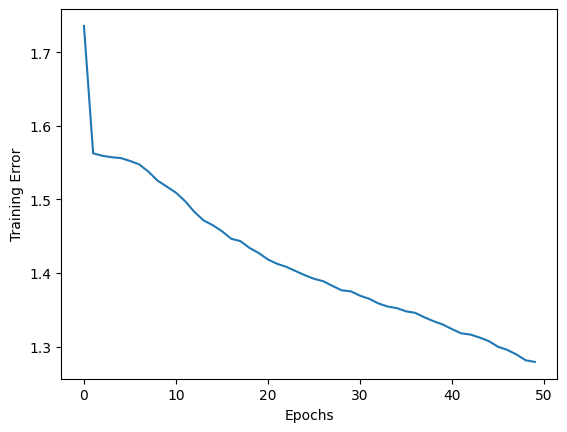

In [21]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [22]:
model.evaluate([test.user_id, test.food_id], test.value)

143/143 [==============================] - 1s 2ms/step - loss: 1.8724


1.8724344968795776

In [23]:
model_path = './recommendation_model.h5'
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Convert To JSON**

In [24]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalle

In [25]:
!tensorflowjs_converter --input_format=keras {model_path} ./

2023-12-03 07:19:33.444958: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 07:19:33.445015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 07:19:33.446514: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 07:19:34.981486: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## **Prediction**

In [26]:
id_foods = np.array(list(set(user_data.food_id)))
id_foods

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151])

In [27]:
tmp_id_users = random.randint(1, 151)
id_users = np.array([tmp_id_users for i in range(len(id_foods))])
id_users

array([104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104,
       104, 104, 104, 104, 104, 104, 104, 104])

In [28]:
predictions = model.predict([id_users, id_foods])

predictions = np.array([a[0] for a in predictions])

recommended_food_ids = (-predictions).argsort()[:20]
recommended_food_ids

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 6ms/step


array([ 15,  64, 142,  11,  73,   9, 116,   1,  27,  18,  77,  82, 123,
       101,   7, 135,  98,  48, 120,  42])

In [29]:
food_list = food_data[food_data['food_id'].isin(recommended_food_ids)]
food_list

,food_id,nama_makanan,sumber,tipe,jenis_olahan,kalori,protein,lemak,karbohidrat,daging_kerbau,...,daging_babi,daging_kambing,daging_sapi,ikan,kedelai,sayur,susu,telur_ayam,tepung,umbi_umbian
0,1,Bakso,Daging Sapi,Makanan Berat,Rebus,202,12.41,13.16,7.58,0,...,0,0,1,0,0,0,0,0,0,0
6,7,Sop daging sapi,Daging Sapi,Makanan Berat,Rebus,49,5.80,0.50,5.30,0,...,0,0,1,0,0,0,0,0,0,0
8,9,Sop kambing,Daging Kambing,Makanan Berat,Rebus,34,5.50,0.80,1.10,0,...,0,1,0,0,0,0,0,0,0,0
10,11,Sop saudara,Daging Sapi,Makanan Berat,Rebus,89,7.20,5.00,3.90,0,...,0,0,1,0,0,0,0,0,0,0
14,15,Soto jeroan,Daging Sapi,Makanan Berat,Rebus,92,11.80,4.30,1.40,0,...,0,0,1,0,0,0,0,0,0,0
17,18,Soto padang,Daging Sapi,Makanan Berat,Rebus,127,5.90,6.60,11.00,0,...,0,0,1,0,0,0,0,0,0,0
26,27,Kwaci,Biji-bijian,Makanan Ringan,Panggang,515,30.60,42.10,13.80,0,...,0,0,0,0,0,0,0,0,0,0
41,42,Lapis legit,Tepung,Makanan Ringan,Kukus,389,6.60,15.70,55.50,0,...,0,0,0,0,0,0,0,0,1,0
47,48,Asinan Bogor,Sayur,Makanan Ringan,Mentah,98,3.90,2.60,14.80,0,...,0,0,0,0,0,1,0,0,0,0
63,64,Sosis hati sapi,Daging Sapi,Makanan Berat,Rebus,274,16.00,22.00,3.00,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
# # Work

# def recommendation(user_calories, allergies):
#     list_food = food_list['nama_makanan'].values
#     food_query = food_data[food_data['nama_makanan'].isin(list_food)]

#     data_nut_food = food_query[food_query["nama_makanan"].isin(list_food)]

#     if allergies == None:
#         list_food = list_food[:15]
#         filtered_data_food = data_nut_food[data_nut_food['nama_makanan'].isin(list_food)]
#     else:
#         for allergy in allergies:
#             filtered_data_food = data_nut_food[data_nut_food[allergy] != 1]


#     data_nut_cal = filtered_data_food[["nama_makanan", "kalori"]]

#     # Filter foods into snack and non-snack categories
#     snack_foods = filtered_data_food[filtered_data_food['tipe'] != 'Makanan Berat']
#     list_snack = snack_foods['nama_makanan'].values

#     non_snack_foods = filtered_data_food[filtered_data_food['tipe'] != 'Makanan Ringan']
#     list_non_snack = non_snack_foods['nama_makanan'].values

#     # Generate combinations of 3 snack foods and 1 non-snack food
#     comb_4 = []
#     for snack_comb in combinations(list_non_snack, 3):
#         for non_snack_comb in combinations(list_snack, 1):
#             comb_4.append(snack_comb + non_snack_comb)

#     # Calculate and filter valid combinations based on total calories
#     valid_combinations = []
#     for comb in comb_4:
#         total_calories = sum(data_nut_cal[data_nut_cal["nama_makanan"].isin(comb)]["kalori"])
#         if total_calories <= user_calories:
#             valid_combinations.append((comb, total_calories))

#     valid_combinations.sort(key=lambda x: x[1], reverse=True)  # Sort by total calories

#     return valid_combinations[:7]  # Return the top num_eat combinations

In [31]:
# hafidh = recommendation(user_calories=1700, allergies=['daging_babi', 'daging_kambing'])

In [32]:
# hafidh

In [33]:
# # Function that will be used
def recommendation(user_calories, allergies):
    # read csv data to get all food data
    food_data = pd.read_csv("dataset/dataset/food_data_final.csv")

    # assign random value to a new user
    id_foods = np.array(list(range(1,152)))
    tmp_id_users = random.randint(1, 151)
    id_users = np.array([tmp_id_users for i in range(len(id_foods))])

    # load model
    model = tf.keras.models.load_model('recommendation_model.h5')

    # predict list food based on user
    predictions = model.predict([id_users, id_foods])
    predictions = np.array([a[0] for a in predictions])

    # get top 50 food
    recommended_food_ids = (-predictions).argsort()[:50]

    # get food name based on food id
    food_list = food_data[food_data['food_id'].isin(recommended_food_ids)]
    list_food = food_list['nama_makanan'].values

    food_query = food_data[food_data['nama_makanan'].isin(list_food)]

    data_nut_food = food_query[food_query["nama_makanan"].isin(list_food)]

    # Filter foods based on allergies
    if allergies == None:
        filtered_data_food = data_nut_food[data_nut_food['nama_makanan'].isin(list_food)]
    else:
        for allergy in allergies:
            filtered_data_food = data_nut_food[data_nut_food[allergy] != 1]

    # get food name and calories
    data_nut_cal = filtered_data_food[["nama_makanan", "kalori"]]

    # Filter foods into snack and non-snack categories
    snack_foods = filtered_data_food[filtered_data_food['tipe'] != 'Makanan Berat']
    list_snack = snack_foods['nama_makanan'].values

    non_snack_foods = filtered_data_food[filtered_data_food['tipe'] != 'Makanan Ringan']
    list_non_snack = non_snack_foods['nama_makanan'].values

    # Generate combinations of 3 non-snack foods and 1 snack food
    comb_4 = []
    for snack_comb in combinations(list_non_snack, 3):
        for non_snack_comb in combinations(list_snack, 1):
            comb_4.append(snack_comb + non_snack_comb)

    # Calculate and filter valid combinations based on total calories
    valid_combinations = []
    for comb in comb_4:
        total_calories = sum(data_nut_cal[data_nut_cal["nama_makanan"].isin(comb)]["kalori"])
        if total_calories <= user_calories:
            valid_combinations.append((comb, total_calories))

    valid_combinations.sort(key=lambda x: x[1], reverse=True)  # Sort by total calories

    # Pick random combination from top 7 combinations with hingest total calories and its total calories
    top_7_combinations = valid_combinations[:7]
    chosen_combination = random.choice(top_7_combinations)

    return chosen_combination

In [34]:
hafidh = recommendation(user_calories=1700, allergies=['daging_babi', 'daging_kambing'])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 3ms/step


In [35]:
hafidh

(('Usus ayam goreng',
  'Dendeng Mujahir, Goreng',
  'Martabak Mesir',
  'Tempe kedelai murni, goreng'),
 1699)

In [36]:
# # Check if the list food can be assign
# def recommendation(user_calories, allergies, list_food_user):
#     # read csv data to get all food data
#     food_data = pd.read_csv("dataset/dataset/food_data_final.csv")

#     # choose which list food that will be used
#     if len(list_food_user) >= 50:
#         id_foods = np.array(list_food_user)
#     else:
#         id_foods = np.array(list(range(1, 51)))

#     tmp_id_users = random.randint(1, 151)
#     id_users = np.array([tmp_id_users for i in range(len(id_foods))])

#     # load model
#     model = tf.keras.models.load_model('recommendation_model.h5')

#     # predict list food based on user
#     predictions = model.predict([id_users, id_foods])
#     predictions = np.array([a[0] for a in predictions])

#     # get top 20 food
#     recommended_food_ids = (-predictions).argsort()[:int(len(id_foods)*0.5)]

#     # get food name based on food id
#     food_list = food_data[food_data['food_id'].isin(recommended_food_ids)]
#     list_food = food_list['nama_makanan'].values

#     food_query = food_data[food_data['nama_makanan'].isin(list_food)]

#     data_nut_food = food_query[food_query["nama_makanan"].isin(list_food)]

#     # Filter foods based on allergies
#     if allergies == None:
#         filtered_data_food = data_nut_food[data_nut_food['nama_makanan'].isin(list_food)]
#     else:
#         for allergy in allergies:
#             filtered_data_food = data_nut_food[data_nut_food[allergy] != 1]

#     # get food name and calories
#     data_nut_cal = filtered_data_food[["nama_makanan", "kalori"]]

#     # Filter foods into snack and non-snack categories
#     snack_foods = filtered_data_food[filtered_data_food['tipe'] != 'Makanan Berat']
#     list_snack = snack_foods['nama_makanan'].values

#     non_snack_foods = filtered_data_food[filtered_data_food['tipe'] != 'Makanan Ringan']
#     list_non_snack = non_snack_foods['nama_makanan'].values

#     # Generate combinations of 3 non-snack foods and 1 snack food
#     comb_4 = []
#     for snack_comb in combinations(list_non_snack, 3):
#         for non_snack_comb in combinations(list_snack, 1):
#             comb_4.append(snack_comb + non_snack_comb)

#     # Calculate and filter valid combinations based on total calories
#     valid_combinations = []
#     for comb in comb_4:
#         total_calories = sum(data_nut_cal[data_nut_cal["nama_makanan"].isin(comb)]["kalori"])
#         if total_calories <= user_calories:
#             valid_combinations.append((comb, total_calories))

#     valid_combinations.sort(key=lambda x: x[1], reverse=True)  # Sort by total calories

#     # Pick random combination from top 7 combinations with hingest total calories and its total calories
#     top_7_combinations = valid_combinations[:7]
#     chosen_combination = random.choice(top_7_combinations)

#     return chosen_combination

In [37]:
# hafidh = recommendation(user_calories=1700, allergies=['daging_babi', 'daging_kambing'], list_food_user=[])

In [38]:
# hafidh